# 2.4微积分

In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [2]:
def f(x):
  return 3*x**2-4*x

In [3]:
def numerical_lim(f,x,h):
  return (f(x+h)-f(x))/h

h=0.1
for i in range(10):
  print(f'h={h:.10f},numerical_lim={numerical_lim(f,1,h):.10f}')
  h*=0.1

h=0.1000000000,numerical_lim=2.3000000000
h=0.0100000000,numerical_lim=2.0300000000
h=0.0010000000,numerical_lim=2.0030000000
h=0.0001000000,numerical_lim=2.0003000000
h=0.0000100000,numerical_lim=2.0000300000
h=0.0000010000,numerical_lim=2.0000030001
h=0.0000001000,numerical_lim=2.0000002987
h=0.0000000100,numerical_lim=1.9999999878
h=0.0000000010,numerical_lim=2.0000001655
h=0.0000000001,numerical_lim=2.0000001655


In [4]:
def use_svg_display(): #@save
  """使用svg格式在Jupyter中显示绘图
  """
  backend_inline.set_matplotlib_formats('svg')

In [5]:
def set_figsize(figsize=(3.5,2.5)): #@save
  """设置matplotlib的图表大小

  Args:
      figsize (tuple, optional): 图标大小的参数. Defaults to (3.5,2.5).
  """
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

In [6]:
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend): #@save
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [7]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

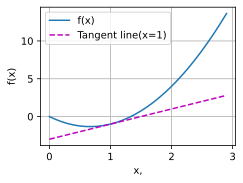

In [8]:
x=np.arange(0,3,0.1)
plot(x,[f(x),2*x-3],'x,','f(x)',legend=['f(x)','Tangent line(x=1)'])

In [9]:
# 2.4.2 偏导数

3x**2+1/X**2
1,0,4
y=4(x-1)
y=4x-4

C:\Users\Admin\AppData\Local\Temp\ipykernel_20124\185047354.py:2: RuntimeWarning: divide by zero encountered in divide
  plot(x,[x**3-1/x,4*x-4],'x,','f(x)',legend=['f(x)','Tangent line(x=1)'])


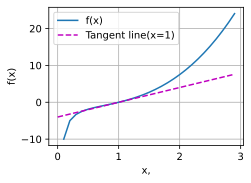

In [10]:
x=np.arange(0,3,0.1)
plot(x,[x**3-1/x,4*x-4],'x,','f(x)',legend=['f(x)','Tangent line(x=1)'])

# 2.5 自动微分

In [11]:
import torch
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [12]:
x.requires_grad=True
x.grad

In [13]:
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [14]:
a=torch.arange(1,4)
b=torch.arange(4,7)
print(a,b)
torch.dot(a,b)  # 1*4+2*5+3*6

tensor([1, 2, 3]) tensor([4, 5, 6])


tensor(32)

In [15]:
y.backward()

In [16]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [17]:
x.grad==4*x

tensor([True, True, True, True])

In [18]:
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [19]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

#### 2.5.3分离计算

In [20]:
#下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。
x.grad.zero_()
y=x*x
u=y.detach()
z=u*x

z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [21]:
x.grad.zero_()
y.sum().backward()
x.grad==2*x

tensor([True, True, True, True])

#### 2.5.4. Python控制流的梯度计算

In [22]:
def f(a):
  b=a*2
  while b.norm()<1000:
    b=b*2
  if b.sum()>0:
    c=b
  else:
    c=100*b
  return c

首先，输入参数 a 被用于计算 b，其中 b 是 a 的两倍。这一步的导数计算相对简单，因为它只涉及标量乘法。

接下来，有一个 while 循环，它检查向量 b 的范数（也称为2-范数或欧几里德范数）是否小于1000。如果是，就将 b 乘以2，继续迭代，直到 b.norm() 大于或等于1000。

之后，有一个条件语句，检查 b 中元素的总和是否大于0。如果是，就将 c 设置为 b，否则将 c 设置为100倍的 b。

最后，函数返回 c。

In [23]:
a=torch.randn(size=(3,1),requires_grad=True)
d=f(a)
d.sum().backward()

In [24]:
a.grad==d/a

tensor([[True],
        [True],
        [True]])

In [25]:
d
#"<MulBackward0>"表示这个张量是通过乘法操作（"Mul"）产生的，"Backward0"表示这是计算图中的第一个反向传播操作。

tensor([[1049.6063],
        [-494.4450],
        [-250.9875]], grad_fn=<MulBackward0>)

In [26]:
a

tensor([[ 2.0500],
        [-0.9657],
        [-0.4902]], requires_grad=True)

### 练习
- 为什么计算二阶导数比一阶导数的开销要更大？
  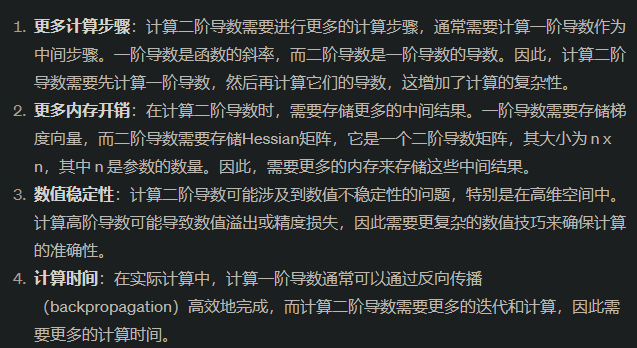
- 在运行反向传播函数之后，立即再次运行它，看看会发生什么。
  
  ``` 在大多数深度学习框架中，例如PyTorch和TensorFlow，运行反向传播函数（通常是backward()函数）后，梯度信息会被清除。这是为了避免重复计算梯度以减少内存消耗和计算开销。

  当您运行反向传播函数后，梯度信息将被计算和存储在与相关张量相关的变量中，以供后续的参数更新和优化使用。如果您再次运行反向传播函数，通常会发现梯度信息已经被清除，因此不会执行任何梯度计算。

  If we use y.backward(retain_graph=True) then we can run y.backward() again as it will do one more time the computation graph 
  ``` 
- 在控制流的例子中，我们计算d关于a的导数，如果将变量a更改为随机向量或矩阵，会发生什么？
  
  ```   
        1 a=torch.randn(size=(3,1),requires_grad=True)
        2 d=f(a)
        ----> 3 d.backward()
        RuntimeError: grad can be implicitly created only for scalar outputs

        run d.sum().backward()
  ```
- 重新设计一个求控制流梯度的例子，运行并分析结果。

  ```
  def f(a):
    b=2*a+abs(a**6)
    c=2*b+5*(b+5)*b
    return c

  a=torch.randn(size=(1,3),requires_grad=True)
  print(a.shape,'\n',a)
  d=f(a)
  d.sum().backward()
  print(a.grad)

  output：torch.Size([1, 3]) 
          tensor([[-1.6077,  0.4600, -0.2909]], requires_grad=True)
          tensor([[-10458.7607,     77.0752,     42.1092]])
  ```
- 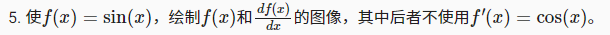

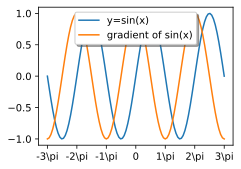

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter,MultipleLocator
import numpy as np
import torch

f,ax =plt.subplots(1)

x=np.linspace(-3*np.pi,3*np.pi,100)
x1=torch.tensor(x,requires_grad=True)
y1=torch.sin(x1)
y1.sum().backward()

ax.plot(x,np.sin(x),label='y=sin(x)')
ax.plot(x,x1.grad,label='gradient of sin(x)')
ax.legend(loc='upper center',shadow=True)

ax.xaxis.set_major_formatter(FuncFormatter(lambda val,pos:'{:.0g}\pi'.format(val/np.pi) if val != 0 else '0'))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

plt.show()

# 2.6 概率

In [28]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l


In [29]:
fair_probs=torch.ones([6])/6
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [30]:
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])